In [1]:
import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras

import gensim
from gensim.models import Word2Vec
from gensim.models import Doc2Vec
import numpy as np
import tensorflow as tf
from tensorflow import keras
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import string

# Clustering
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import pandas as pd
data= pd.read_csv('Lemmi-2.csv')
data

,Unnamed: 0,text,Edition
0,0,in quello giorno essere impossibile passeggiare .,1
1,1,il mattina avere errare per uno ora nel bosche...,1
2,2,ne essere contentare .,1
3,3,non mi essere mai piacere il lungo passeggiate...,1
4,4,"eliza , John e georgiana essere aggruppare in ...",1
...,...,...,...
19797,19797,il paura della morte non offuscare il ultimo o...,2
19798,19798,"il suo stesso parola ne essere pegno : \n\n "" ...",2
19799,19799,ogni giorno mi annunciare con sempre grande ch...,2
19800,19800,", e di ora in ora io rispondere con fervore cr...",2


In [3]:
from spacy.lang.it.stop_words import STOP_WORDS
def clean(x):
  stop = STOP_WORDS
  words  = [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop and w not in string.punctuation]
  return " ".join(words)

In [4]:
data['clean_text'] = data['text'].apply(clean)

In [5]:
def length(x):
  words  = [w for w in word_tokenize(x.lower()) if len(x.split())> 8]
  return " ".join(words)

In [6]:
data['clean'] = data['clean_text'].apply(clean)

In [7]:
data.dropna(subset=['clean'], inplace=True)

In [8]:
text = data['clean']

In [9]:
text

0                                  impossibile passeggiare
1        mattina errare boschetto spogliare foglia pran...
2                                               contentare
3        piacere passeggiate freddo penoso tornar notte...
4        eliza john e georgiana aggruppare salotto atto...
                               ...                        
19797    paura morte offuscare st john mente nube cuore...
19798                       parola pegno signore avvertire
19799                annunciare chiarezza sì venire presto
19800    e rispondere fervore crescente amen venire sig...
19801                                                     
Name: clean, Length: 19802, dtype: object

In [10]:
# Train your own Word2Vec model
i=0
list_of_sent=[]
for sent in data['clean'].values:
    list_of_sent.append(sent.split())

In [11]:
import gensim
# Training the wor2vec model
w2v_model = Word2Vec.load('word2vec_model_lemmi')

In [12]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence is stored in this train
for sent in list_of_sent: # for each sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sent: # for each word in a sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(19802, 100)

#CLUSTERING

In [13]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sent_vectors)
    distortions.append(kmeanModel.inertia_)

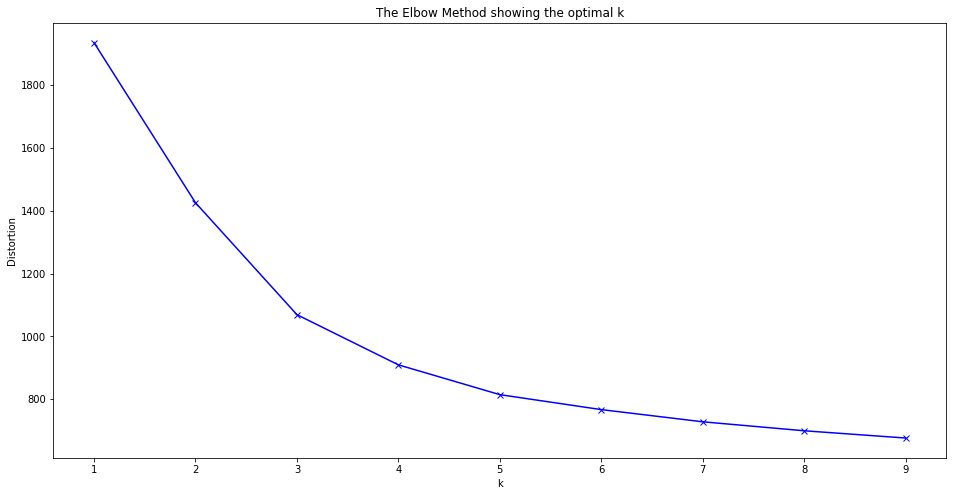

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
# Training
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = 5)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [17]:
# Giving Labels/assigning a cluster to each point/text 
aggdfa = data
aggdfa['Word2Vec Label'] = model2.labels_
aggdfa.head(2)

,Unnamed: 0,text,Edition,clean_text,clean,Word2Vec Label
0,0,in quello giorno essere impossibile passeggiare .,1,impossibile passeggiare,impossibile passeggiare,2
1,1,il mattina avere errare per uno ora nel bosche...,1,mattina errare boschetto spogliare foglia pran...,mattina errare boschetto spogliare foglia pran...,1


In [18]:
# How many points belong to each cluster
aggdfa.groupby(['Word2Vec Label'])['text'].count()

Word2Vec Label
0    3173
1    6285
2    8063
3     495
4    1786
Name: text, dtype: int64

In [91]:
# considers sample of 5 random sentences for cluster 0
# amore e matrimonio

print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][439]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][1203]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2100]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2358]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[0][2128]]['text'])

guardandolo attentamente avere uno non sapere che di spiacevole , o meglio mancavagli ciò che essere fare per piacere .
______________________________________________________________________
avevo fare il mio proposta partire dall' idea che egli volere sposarmi .
______________________________________________________________________
volere sapere se mi trovare bene a thornfield Hall e che tipo di persona essere il padrona di casa ; quando il dissi che c' essere solo uno padrone , mi chiedere se essere uno bell' uomo e se mi piacere .
______________________________________________________________________
poco fa avere alludere a qualcosa che essere accadere durante il mio assenza ... nulla di grave , probabilmente , ma che in qualche modo ti avere turbare .
______________________________________________________________________
ma cosa potere importare a lei , o a chiunque altro , all' infuori di me ?


In [211]:
# considers sample of 5 random sentences for cluster 1
# class struggle

print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][188]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][3]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][5892]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][420]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[1][2702]]['text'])

esse essere vestire quasi come il figlia del povero e guardare il abito di mamma e il miei , come se non avere mai vedere il seta . "
______________________________________________________________________
ella mi avere proibire di unire al loro gruppo , dire che deplorare il necessità in cui trovavasi di tenere così lontano , ma che fino al momento in cui bessie non guarentirebbe che mi studiare di acquistare uno carattere molto socievole e molto infantile , maniera molto cortese e qualcosa di molto radioso , di molto aperto , di molto sincero , non potere concedere il stesso privilegio che al bambino allegro e soddisfatto .
______________________________________________________________________
avere sempre avere il mio io , ancora   intatto , a cui rivolgere e il mio sentimento spontaneo e indomito con cui comunicare nel momento di solitudine .
______________________________________________________________________
dimenticai allora per uno momento il mio stato per abbandonare a uno va

In [137]:
# considers sample of 5 random sentences for cluster 2
# religione

print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][7651]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][5658]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][8005]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][1322]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[2][2750]]['text'])
print("_" * 70)

il vittorioso ereditare tutto il cosa ; e io essere il suo dio ed egli essere mio figlio .
______________________________________________________________________
avere lasciare questo donna con il cuore pieno di odio e amarezza e , adesso , tornare da lei senza altro emozione che uno sorta di pietà per il suo grande sofferenza e uno forte desiderio di dimenticare e perdonare tutto il torto subiti , di potere riconciliare con lei e stringere amichevolmente il mano .
______________________________________________________________________
avere iniziare a provare rimorso e pentimento , a desiderare di riconciliarmi col mio creatore .
______________________________________________________________________
parere uno bello ebrea del tempo del patriarca .
______________________________________________________________________
il intimità che si essere presto stabilire fra il signorina rivers e me , non si essere comunicare a saint-john , forse perché stare poco in casa , dedicare egli uno gran 

In [186]:
#considers sample of 5 random sentences for cluster 3

print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][4]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][426]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][124]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][44]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][12]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[3][111]]['text'])

tale essere infatti in quello momento .
______________________________________________________________________
lo avere fare questo favore ?
______________________________________________________________________
parte da solo ? "
______________________________________________________________________
 non fare nulla .
______________________________________________________________________
non avere paura , spero .
______________________________________________________________________
" qualche volta . "


In [172]:
# considers sample of 5 random sentences for cluster 4
# self discovery

print(data.iloc[data.groupby(['Word2Vec Label']).groups[4][1388]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[4][520]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[4][15]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[4][1439]]['text'])
print("_" * 70)
print(data.iloc[data.groupby(['Word2Vec Label']).groups[4][1726]]['text'])

mr rochester avere uno moglie tuttora vivente " .
______________________________________________________________________
 signor rochester " 

  andatevene , ve lo permettere , ma ricordare che mi lasciare nel dolore .
______________________________________________________________________
che scandaloso condotta , signorina eyre !
______________________________________________________________________
soltanto uno promessa : ' essere vostro , mr rochester ' . "
______________________________________________________________________
" vi avere dire che essere indipendente , signore , oltre che ricco .


In [24]:
Cluster0 = (data.iloc[data.groupby(['Word2Vec Label']).groups[0]])
Cluster1 = (data.iloc[data.groupby(['Word2Vec Label']).groups[1]])
Cluster2 = (data.iloc[data.groupby(['Word2Vec Label']).groups[2]])
Cluster3 = (data.iloc[data.groupby(['Word2Vec Label']).groups[3]])
Cluster4 = (data.iloc[data.groupby(['Word2Vec Label']).groups[4]])
#Cluster5 = (data.iloc[data.groupby(['Word2Vec Label']).groups[5]])

In [25]:
s = 1
Treves_0 = Cluster0[Cluster0['Edition'] == s]
Treves_1 = Cluster1[Cluster1['Edition'] == s]
Treves_2 = Cluster2[Cluster2['Edition'] == s]
Treves_3 = Cluster3[Cluster3['Edition'] == s]
Treves_4 = Cluster4[Cluster4['Edition'] == s]
#Treves_5 = Cluster5[Cluster5['Edition'] == s]

In [26]:
s = 2
Feltrinelli_0 = Cluster0[Cluster0['Edition'] == s]
Feltrinelli_1 = Cluster1[Cluster1['Edition'] == s]
Feltrinelli_2 = Cluster2[Cluster2['Edition'] == s]
Feltrinelli_3 = Cluster3[Cluster3['Edition'] == s]
Feltrinelli_4 = Cluster4[Cluster4['Edition'] == s]
#Feltrinelli_5 = Cluster5[Cluster5['Edition'] == s]

In [27]:
common_0 = list(set(Treves_0.clean.values).intersection(set(Feltrinelli_0.clean.values)))
common_1 = list(set(Treves_1.clean.values).intersection(set(Feltrinelli_1.clean.values)))
common_2 = list(set(Treves_2.clean.values).intersection(set(Feltrinelli_2.clean.values)))
common_3 = list(set(Treves_3.clean.values).intersection(set(Feltrinelli_3.clean.values)))
common_4 = list(set(Treves_4.clean.values).intersection(set(Feltrinelli_4.clean.values)))
#common_5 = list(set(Treves_5.clean.values).intersection(set(Feltrinelli_5.clean.values)))

In [28]:
uncommon_0 = list(set(Treves_0.clean.values).symmetric_difference(set(Feltrinelli_0.clean.values)))
uncommon_1 = list(set(Treves_1.clean.values).symmetric_difference(set(Feltrinelli_1.clean.values)))
uncommon_2 = list(set(Treves_2.clean.values).symmetric_difference(set(Feltrinelli_2.clean.values)))
uncommon_3 = list(set(Treves_3.clean.values).symmetric_difference(set(Feltrinelli_3.clean.values)))
uncommon_4 = list(set(Treves_4.clean.values).symmetric_difference(set(Feltrinelli_4.clean.values)))
#uncommon_5 = list(set(Treves_5.clean.values).symmetric_difference(set(Feltrinelli_5.clean.values)))

In [29]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_0.clean).toarray()

CLUSTER 0 - amore e matrimonio

In [30]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_0.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['felice', 'esistenza', 'edoardo', 'contento', 'amare', 'zio',
       'esercitare', 'errore', 'esagerato', 'esaltare'], dtype='<U17')

In [31]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_0.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['chiarezza', 'annunciare', 'presto', 'sì', 'venire', 'errore',
       'ercole', 'eternità', 'evidente', 'evidenza'], dtype='<U16')

CLUSTER 1 - class struggle - il ruolo del fuoco e della fiamma corrisponde all'incendio in cui il signor Rochester perderà la mano. Dopo questo evento, lui abbandona l'arroganza legata al suo aspetto fisico e decide di sposare Jane. La profezia e l'annuncio corrispondono alla fortuna che eredita Jane dallo zio morto.

In [32]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_1.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['liberazione', 'profezia', 'chiaramente', 'attestare', 'avvertire',
       'maestro', 'annunziare', 'scrivere', 'étre', 'famiglia'],
      dtype='<U17')

In [33]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_1.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['piangere', 'être', 'fieno', 'fiaccare', 'fiacco', 'fiamma',
       'fiammeggiante', 'fiancheggiare', 'fianco', 'fiato'], dtype='<U17')

Cluster 2 - religione

In [34]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_2.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['avanzo', 'amen', 'scorrere', 'gesù', 'ardore', 'rapidamente',
       'rispondere', 'venire', 'signore', 'esclamare'], dtype='<U18')

In [35]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_2.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['amen', 'crescente', 'gesù', 'fervore', 'rispondere', 'signore',
       'venire', 'evocare', 'evento', 'evidente'], dtype='<U18')

Cluster 3

In [36]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_3.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['ventiquattro', 'spero', 'reggetelo', 'raccontatemelo', 'paura',
       'olà', 'matteo', 'jane', 'impacciare', 'divisa'], dtype='<U14')

In [37]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_3.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['uscirono', 'incalzai', 'acconsentii', 'arrabbiatevi', 'asserì',
       'diana', 'dick', 'felice', 'grugnì', 'irlanda'], dtype='<U12')

Cluster 4 - self discovery

In [38]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Treves_4.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['augurio', 'signorina', 'zitta', 'divenuta', 'domare', 'domani',
       'domandare', 'domandai', 'domanda', 'dolore'], dtype='<U16')

In [39]:
tfidf = TfidfVectorizer()
#X = Feltrinelli_0.clean
X_tfidf = tfidf.fit_transform(Feltrinelli_4.clean).toarray()
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(X_tfidf).flatten()[::-1]
n = 10
top_n = feature_array[tfidf_sorting][:n]
top_n

array(['avvertire', 'pegno', 'parola', 'signore', 'zona', 'edward',
       'esageri', 'ereditiera', 'entrare', 'emozionare'], dtype='<U17')